**User Input Here**

In [ ]:
print('Welcome to the COVID-19 Covidestim Statistics')
print('')
print('Please tell me which state you would like to see. Type full name of state with the first letter capitalized. EX: Florida, Georgia etc.')
print('states/territories not available: California,DC,Delaware,Indiana,Illinois,Lousiana,Michigan,Missouri,North Carolina,Nevada,Pennslyvania,Texas,Vermont,West Virgina')
userinput = input('Please put state name here:')

Welcome to the COVID-19 Covidestim Statistics

Please tell me which state you would like to see. Type full name of state with the first letter capitalized. EX: Florida, Georgia etc.
states/territories not available: California,DC,Delaware,Indiana,Illinois,Lousiana,Michigan,Missouri,North Carolina,Nevada,Pennslyvania,Texas,Vermont,West Virgina
Please put state name here:Florida


**Framework for Cases and Deaths from Covidestim**

In [ ]:
# Might need this cell if your data does not download directly from the URL
#!pip install fsspec
#!pip install pandas

In [ ]:
import pandas as pd
import matplotlib as plt

In [ ]:
# Ignore this 
data = { 'Alabama': 'AL', 'Alaska': 'AK', 'American Samoa': 'AS', 'Arizona': 'AZ', 'Arkansas': 'AR', 'California': 'CA', 'Colorado': 'CO', 'Connecticut': 'CT', 'Delaware': 'DE', 'District of Columbia': 'DC', 'Florida': 'FL', 'Georgia': 'GA', 'Guam': 'GU', 'Hawaii': 'HI', 'Idaho': 'ID', 'Illinois': 'IL', 'Indiana': 'IN', 'Iowa': 'IA', 'Kansas': 'KS', 'Kentucky': 'KY', 'Louisiana': 'LA', 'Maine': 'ME', 'Maryland': 'MD', 'Massachusetts': 'MA', 'Michigan': 'MI', 'Minnesota': 'MN', 'Mississippi': 'MS', 'Missouri': 'MO', 'Montana': 'MT', 'Nebraska': 'NE', 'Nevada': 'NV', 'New Hampshire': 'NH', 'New Jersey': 'NJ', 'New Mexico': 'NM', 'New York': 'NY', 'North Carolina': 'NC', 'North Dakota': 'ND', 'Northern Mariana Islands':'MP', 'Ohio': 'OH', 'Oklahoma': 'OK', 'Oregon': 'OR', 'Pennsylvania': 'PA', 'Puerto Rico': 'PR', 'Rhode Island': 'RI', 'South Carolina': 'SC', 'South Dakota': 'SD', 'Tennessee': 'TN', 'Texas': 'TX', 'Utah': 'UT', 'Vermont': 'VT', 'Virgin Islands': 'VI', 'Virginia': 'VA', 'Washington': 'WA', 'West Virginia': 'WV', 'Wisconsin': 'WI', 'Wyoming': 'WY' }

In [ ]:
# Loading in the data
url = 'https://covidestim.s3.us-east-2.amazonaws.com/latest/state/estimates.csv'
df= pd.read_csv(url)

In [ ]:
# Setting datetime index 
df.date = pd.to_datetime(df.date)
df = df[df.date >= '2020-03-01']

In [ ]:
# Making sure the data starts after 03-01-2020
df = df[df.date >= '2020-03-01']

In [ ]:
# Slicing the data 
df = df.loc[:,['state','date','cases.fitted','deaths.fitted']]

In [ ]:
# Cleaning the data
df['Cases'] = df['cases.fitted']
df['Deaths'] = df['deaths.fitted']
df = df.drop(columns =['cases.fitted','deaths.fitted'])

In [ ]:
# Selecting the state
df = df[df.state == userinput]

In [ ]:
# Cleaning the data
df= df.reset_index(drop = True)

In [ ]:
# Selecting the state
df = df[df.state == userinput]

In [ ]:
# Calulating the cummulative cases
for i in range(1,len(df)):
  x = df.loc[i,'Cases'] + df.loc[i-1,'Cases']
  df.loc[i,'Cases'] = x

In [ ]:
# Calulating the cummulative deaths
for i in range(1,len(df)):
  x = df.loc[i,'Deaths'] + df.loc[i-1,'Deaths']
  df.loc[i,'Deaths'] = x

In [ ]:
# Creating day column for each date 
df['Day'] = df.groupby('state')['date'].rank(ascending=True)

In [ ]:
df['Avg day of case'] = 0 # declaring new column
df['Avg day of death'] = 0

In [ ]:
# Setting the first day of each state to be the first date of cases 
df.loc[df.groupby('state')['date'].head(1).index, 'Avg day of case'] = df.loc[:,'Day']

In [ ]:
# Setting it so the avg day of death is the first day 
df = df[df.Deaths > 0]

In [ ]:
#Setting the first day as the first row in Avg day of death

df.loc[df.groupby('state')['date'].head(1).index, 'Avg day of death'] = df.loc[:,'Day']

In [ ]:
# creating the CDF Column
df['cdf_cases'] = df['Cases']

In [ ]:
#creating the cdf column
df['cdf_deaths'] = df['Deaths']

In [ ]:
#creating the formula for the CDF column
df.loc[:,'cdf_cases':] = df.loc[:,'cdf_cases':].div(df.iloc[-1]['cdf_cases':])
df = df.reset_index()

In [ ]:
#creating the formula for the CDF column
df['cdf_deaths'] = df.loc[:,'cdf_deaths':].div(df.iloc[-1]['cdf_deaths':])

In [ ]:
#Calulating Avgerage day of case
for i in range(1, len(df)):
  x = (((df.loc[i, 'Cases'] - df.loc[i-1, 'Cases']) * (df.loc[i, 'Day']- df.loc[i-1, 'Avg day of case'])) / (df.loc[i, 'Cases'])) + (df.loc[i-1, 'Avg day of case'])
  df.loc[i, 'Avg day of case'] = round(x, 2)

In [ ]:
#Calulating Avgerage day of death
for i in range(1, len(df)):
  x = (((df.loc[i, 'Deaths'] - df.loc[i-1, 'Deaths']) * (df.loc[i, 'Day']- df.loc[i-1, 'Avg day of death'])) / (df.loc[i, 'Deaths'])) + (df.loc[i-1, 'Avg day of death'])
  df.loc[i, 'Avg day of death'] = round(x, 2)

In [ ]:
df['Avg Death Day - Avg Case Day'] = df['Avg day of death'] - df['Avg day of case'] 

In [ ]:
df['Avg Day of Case/ Current Day'] = df['Avg day of case'] / df['Day']

In [ ]:
df['Avg Day of Death/ Current Day'] = df['Avg day of death'] / df['Day']

In [ ]:
df = df.drop(columns = 'index')

**Framework for hospital Data**

In [ ]:
# downloading the data
url = 'https://covidtracking.com/data/download/all-states-history.csv'

In [ ]:
# saving to a df
hospitalizationdf = pd.read_csv(url)

In [ ]:
#indexing column
hospitalizationdf = hospitalizationdf.loc[:,['state','date','hospitalizedCumulative']]

In [ ]:
#changing to datetime 
hospitalizationdf.date = pd.to_datetime(hospitalizationdf.date)

In [ ]:
# making sure the state is the same
hospitalizationdf = hospitalizationdf[hospitalizationdf.state == data[userinput]]

In [ ]:
# Flipping the df
hospitalizationdf = hospitalizationdf.iloc[::-1]

In [ ]:
# starting the date at 03-01-2020
hospitalizationdf = hospitalizationdf[hospitalizationdf['date'] >= '03-01-2020']

In [ ]:
# making sure the date is greater than 0
hospitalizationdf = hospitalizationdf [hospitalizationdf.hospitalizedCumulative >0]

In [ ]:
# resetting the index
hospitalizationdf = hospitalizationdf.reset_index()

In [ ]:
# cleaning data 
hospitalizationdf = hospitalizationdf.drop(columns= 'index')

In [ ]:
#merging the two dataframes together
df = df.merge(hospitalizationdf, on ='date')

In [ ]:
# cleaning data
df = df.drop(columns = ['state_y'])

In [ ]:
# cleaning data 
df['state'] = df['state_x']

In [ ]:
#cleanign data
df = df.drop(columns = 'state_x')

In [ ]:
#creating the cdf column
df['cdf_hospitalized'] = df['hospitalizedCumulative']

In [ ]:
#creating the formula for the CDF column
df.loc[:,'cdf_hospitalized':] = df.loc[:,'cdf_hospitalized':].div(df.iloc[-1]['cdf_hospitalized':])
df = df.reset_index(drop= True)

In [ ]:
# Creating avg day of hospitalization
df['Avg day of hospitalization'] = 0

In [ ]:
#Calulating Avgerage day of Hospitalization
for i in range(1, len(df)):
  x = (((df.loc[i, 'hospitalizedCumulative'] - df.loc[i-1, 'hospitalizedCumulative']) * (df.loc[i, 'Day']- df.loc[i-1, 'Avg day of hospitalization'])) / (df.loc[i, 'hospitalizedCumulative'])) + (df.loc[i-1, 'Avg day of hospitalization'])
  df.loc[i, 'Avg day of hospitalization'] = round(x, 2)

In [ ]:
df['Avg Hospitalization Day - Avg Case Day'] = df['Avg day of hospitalization'] - df['Avg day of case']  

In [ ]:
df['Avg Day of Hospitalization/ Current Day'] = df['Avg day of hospitalization'] /df['Day']

In [ ]:
# Cleaning dataframe
df = df.loc[:,['date','state','Deaths','Cases','hospitalizedCumulative','Day','Avg day of case','Avg day of death','Avg day of hospitalization','Avg Death Day - Avg Case Day','Avg Hospitalization Day - Avg Case Day','Avg Day of Case/ Current Day','Avg Day of Death/ Current Day','Avg Day of Hospitalization/ Current Day','cdf_cases','cdf_deaths','cdf_hospitalized']]

In [ ]:
df

,date,state,Deaths,Cases,hospitalizedCumulative,Day,Avg day of case,Avg day of death,Avg day of hospitalization,Avg Death Day - Avg Case Day,Avg Hospitalization Day - Avg Case Day,Avg Day of Case/ Current Day,Avg Day of Death/ Current Day,Avg Day of Hospitalization/ Current Day,cdf_cases,cdf_deaths,cdf_hospitalized
0,2020-03-21,Florida,6.321673,6.186583e+02,158.0,21.0,18.38,17.99,0.00,-0.39,-18.38,0.875238,0.856667,0.000000,0.000314235,0.000196365,0.00192128
1,2020-03-22,Florida,8.287127,8.223042e+02,185.0,22.0,19.28,18.94,3.21,-0.34,-16.07,0.876364,0.860909,0.145909,0.000417672,0.000257416,0.0022496
2,2020-03-23,Florida,10.799842,1.078587e+03,217.0,23.0,20.16,19.88,6.13,-0.28,-14.03,0.876522,0.864348,0.266522,0.000547846,0.000335466,0.00263871
3,2020-03-24,Florida,13.984271,1.395712e+03,259.0,24.0,21.03,20.82,9.03,-0.21,-12.00,0.876250,0.867500,0.376250,0.000708923,0.000434381,0.00314943
4,2020-03-25,Florida,17.982821,1.781497e+03,316.0,25.0,21.89,21.75,11.91,-0.14,-9.98,0.875600,0.870000,0.476400,0.000904875,0.000558585,0.00384255
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
347,2021-03-03,Florida,31197.263343,1.922309e+06,81278.0,368.0,242.93,232.18,207.58,-10.75,-35.35,0.660136,0.630924,0.564076,0.976397,0.969054,0.988339
348,2021-03-04,Florida,31310.776406,1.927502e+06,81600.0,369.0,243.27,232.68,208.22,-10.59,-35.05,0.659268,0.630569,0.564282,0.979035,0.97258,0.992254
349,2021-03-05,Florida,31421.225354,1.932601e+06,81902.0,370.0,243.60,233.16,208.82,-10.44,-34.78,0.658378,0.630162,0.564378,0.981625,0.976011,0.995926
350,2021-03-06,Florida,31528.591294,1.937594e+06,82145.0,371.0,243.93,233.63,209.30,-10.30,-34.63,0.657493,0.629730,0.564151,0.984161,0.979346,0.998881


**Statistics**

In [ ]:
averagedayofcase = df['Avg day of case'].iloc[-1]
averagedayofdeath = df['Avg day of death'].iloc[-1]
differDeaths = df['Avg Death Day - Avg Case Day'].max()
differCases= -df['Avg Death Day - Avg Case Day'].min()
differhospitalizations = df['Avg Hospitalization Day - Avg Case Day'].max()
differhospitalizations1 = -df['Avg Hospitalization Day - Avg Case Day'].min()

In [ ]:
print('COVID-19 STATISTICS')
print('')
print('State = ', df.state.iloc[-1])
print('Average Day of Death and Average Day of Case as of',df['date'].iloc[-1])
print('Case =', averagedayofcase)
print('Death = ', averagedayofdeath)
print('Days When Average Dates of Death Differ By Largest Amounts')
print('Death Day – Case Day =', differDeaths)
print('Case Day - Death Day =',differCases)
print('Case Day - Hospitalization day = ',differhospitalizations)
print('Hospialization Day - Case Day =', differhospitalizations1) 

COVID-19 STATISTICS

State =  Florida
Average Day of Death and Average Day of Case as of 2021-03-07 00:00:00
Case = 244.25
Death =  234.09
Days When Average Dates of Death Differ By Largest Amounts
Death Day – Case Day = 7.02000000000001
Case Day - Death Day = 22.950000000000003
Case Day - Hospitalization day =  3.4399999999999977
Hospialization Day - Case Day = 38.170000000000016


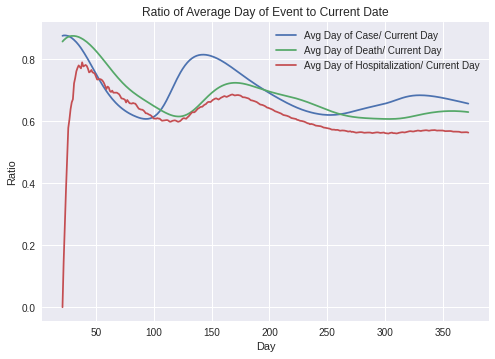

In [ ]:
#Ratio Avg Day of Event/Current Date Graph
df.plot(x= 'Day',y = ['Avg Day of Case/ Current Day','Avg Day of Death/ Current Day','Avg Day of Hospitalization/ Current Day'],title = 'Ratio of Average Day of Event to Current Date', ylabel = 'Ratio')
plt.style.use('seaborn')

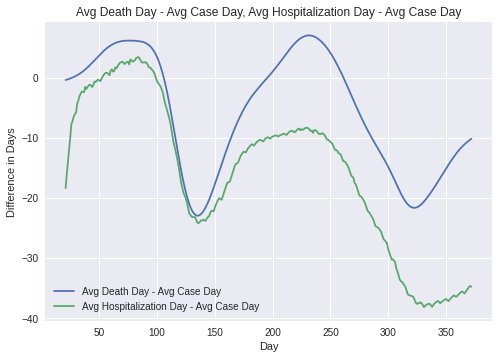

In [ ]:
#Avg Death Day-Avg Case Day
df.plot(x = 'Day', y=['Avg Death Day - Avg Case Day','Avg Hospitalization Day - Avg Case Day'],title = 'Avg Death Day - Avg Case Day, Avg Hospitalization Day - Avg Case Day',ylabel = 'Difference in Days')
plt.style.use('seaborn')

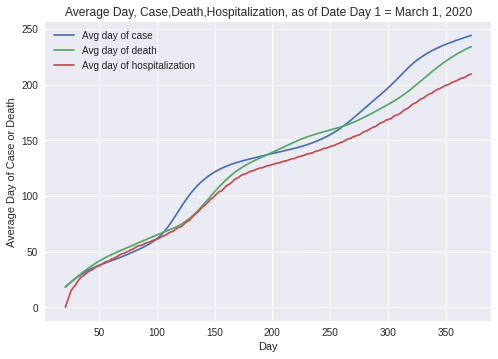

In [ ]:
#Average Case or Death or hospitalization
df.plot(x = 'Day', y= ['Avg day of case','Avg day of death','Avg day of hospitalization'],title = 'Average Day, Case,Death,Hospitalization, as of Date Day 1 = March 1, 2020', ylabel = 'Average Day of Case or Death')
plt.style.use('seaborn')

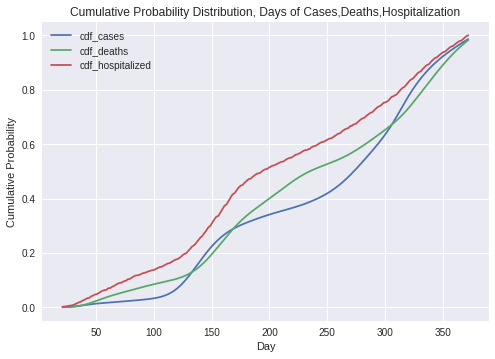

In [ ]:
#CDF
df.plot( x= 'Day', y= ['cdf_cases','cdf_deaths','cdf_hospitalized'],title = 'Cumulative Probability Distribution, Days of Cases,Deaths,Hospitalization', ylabel = 'Cumulative Probability')
plt.style.use('seaborn')